In [ ]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from Manage_data.db_manager import get_data
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
symbols_dict = {
    'tech_symbols' : [
        "AAPL",   # Apple Inc.
        "NVDA",   # Nvidia Corporation
        "MSFT",   # Microsoft Corporation
        "GOOGL",  # Alphabet Inc. (classe A)
        "AMZN",   # Amazon.com Inc.
        "META",   # Meta Platforms Inc.
        "TSLA",   # Tesla Inc.
        "AVGO",   # Broadcom Inc.
        "TCEHY",  # Tencent Holdings Ltd.
        "TSM"     # Taiwan Semiconductor Manufacturing Company
    ],

    'commodities_symbols' : [
        "GC=F",   # Or (Gold) - utilisé pour les semi-conducteurs et connecteurs électroniques
        "SI=F",   # Argent (Silver) - utilisé dans les circuits imprimés et batteries
        "HG=F",   # Cuivre (Copper) - essentiel pour le câblage et les cartes mères
        #"AL=F",   # Aluminium (Aluminum) - utilisé dans la fabrication des boîtiers d’ordinateurs et de smartphones
        "PL=F",   # Platine (Platinum) - utilisé dans certains composants électroniques et piles à combustible
        "PA=F",   # Palladium (Palladium) - essentiel pour la fabrication de capteurs et composants électroniques
        #"LMCADS03=GB",  # Cobalt (Cobalt) - indispensable pour les batteries lithium-ion
        #"LTHM",   # Lithium (Lithium) - essentiel pour les batteries des véhicules électriques et smartphones
        #"FEF=F",  # Minerai de fer (Iron Ore) - utilisé dans la construction d’équipements et de serveurs
        #"ZNCADS03=GB"   # Zinc (Zinc) - utilisé pour le revêtement anticorrosion et certains alliages électroniques
    ],

    'telecom_symbols' : [
        "T",      # AT&T Inc.
        "VZ",     # Verizon Communications Inc.
        "TMUS",   # T-Mobile US, Inc.
        "CSCO",   # Cisco Systems, Inc.
        "NOK",    # Nokia Corporation
        #"ERIC",   # Ericsson (Telefonaktiebolaget LM Ericsson)
        "QCOM",   # Qualcomm Incorporated
        #"CHL",    # China Mobile Limited
        "NTTYY",  # Nippon Telegraph and Telephone Corporation (NTT)
        #"ORAN"    # Orange S.A.
    ]
}

all_symbols = [symbol for category in symbols_dict.values() for symbol in category]
print(all_symbols)

In [ ]:
df = get_data(all_symbols, granularity='daily')
df.head()

In [ ]:
df.dtypes

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity_per_stock(data, var='Adj_close'):
    """
    Teste la stationnarité pour chaque action (Title) en utilisant le test ADF.
    
    :param data: DataFrame avec au moins les colonnes ['Title', 'Date', 'Close']
    """
    results = []

    data["Date"] = pd.to_datetime(data["Date"])
    
    data = data.sort_values(by=["Title", "Date"])

    for title, group in data.groupby("Title"):
        close_prices = group[var].values
        result = adfuller(close_prices, autolag='AIC')
        p_value = result[1]

        results.append({
            "Title": title,
            "ADF Statistic": result[0],
            "p-value": p_value,
            "Stationary": p_value < 0.05  #si p < 0.05, la série est stationnaire
        })

    results_df = pd.DataFrame(results)
    return results_df

test_stationarity_per_stock(df)


In [ ]:

def plot_stock(df, title, columns='Adj_close', begin_y=2024):
    df_test = df[df['Title'] == title].copy()
    df_test = df_test[df_test["Date"].dt.year >= begin_y]
    plt.figure(figsize=(12, 6))

    for col in columns:
        plt.plot(df_test["Date"], df_test[col], linestyle="-", label=col)
        plt.title(f"{title} {col} over time")

    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

    del df_test

#columns = [col for col in df.select_dtypes(include=['float'])]
columns = ['Adj_close']#'Volume', 

plot_stock(df, 'GOOGL', columns=columns)


In [ ]:
for var in df.columns:
    if var in ['Date', 'Title']: continue
    df[var] = df.groupby('Title')[var].pct_change()

df.dropna(inplace=True)


In [ ]:
test_stationarity_per_stock(df)

In [ ]:
for symbol in all_symbols[:3]:
    plot_stock(df, symbol, columns=columns)

/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/ts

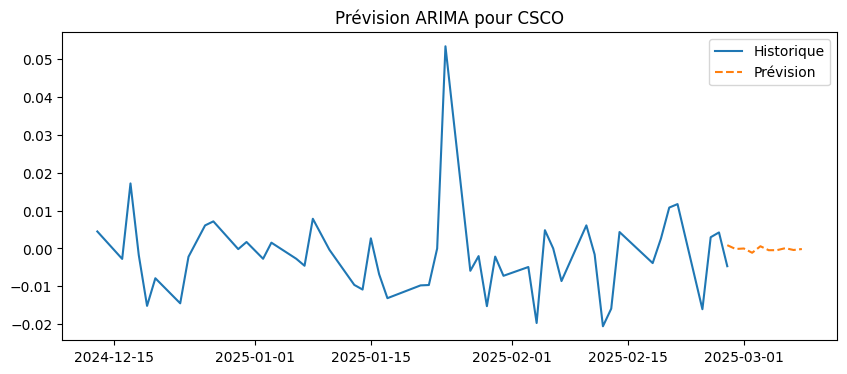

/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/ts

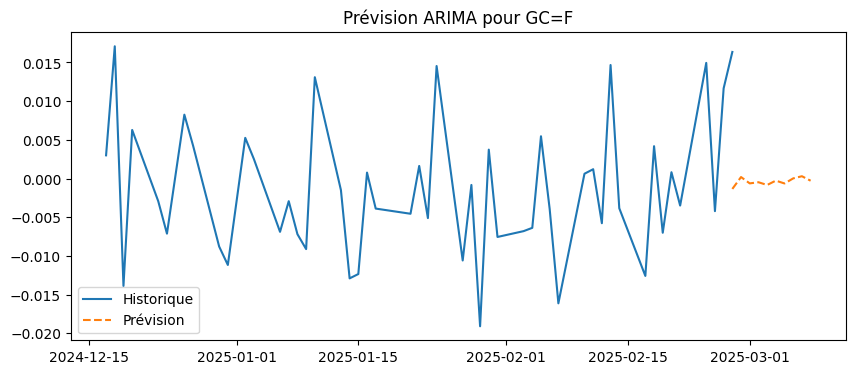

/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ndubourg/Documents/Cours/Master2/MLFi/projetfi/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df.sort_values(by=['Title', 'Date'], inplace=True)

forecast_results = {}

for title in df['Title'].unique()[3:]:
    df_title = df[df['Title'] == title].set_index('Date')
    series = df_title['Adj_close'].dropna()
    
    model = sm.tsa.ARIMA(series, order=(10, 0, 2))
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=10)
    forecast_index = pd.date_range(start=series.index[-1], periods=10, freq='D')
    
    forecast_results[title] = pd.Series(forecast, index=forecast_index)
    
    plt.figure(figsize=(10, 4))
    plt.plot(series[-50:], label='Historique')
    plt.plot(forecast_index, forecast, label='Prévision', linestyle='dashed')
    plt.title(f"Prévision ARIMA pour {title}")
    plt.legend()
    plt.show()

forecast_df = pd.DataFrame(forecast_results)
print(forecast_df)

# /!\ Problème de step?


In [ ]:
df[df['Title'] == 'GOOGL'].head()

In [ ]:
# df["Date"] = df["Date"].dt.strftime("%Y/%-m/%-d 0:00")
# df = df.rename(columns={"Date": "date"})
# df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
# df = df.pivot_table(index="date", columns="Title", values="Adj_close")
# df = df.rename(columns={"META":"OT"})


# # df["Volume"] = df["Volume"].astype(float)

# for var in df.columns:
#     if var in ['date', 'Title']: continue
#     df[var] = df[var].pct_change()

# df.dropna(inplace=True)


In [ ]:
# dataset_dir = "../dataset/stock_var"
# os.makedirs(dataset_dir, exist_ok=True)
# csv_path = os.path.join(dataset_dir, "stock.csv")
# df.to_csv(csv_path, index=True)
# df.to_csv()